In [ ]:
import pandas as pd
df = pd.read_csv('Dataset2.csv')

# Display the first few rows of the dataset
df


,Unnamed: 0,Name,Platform,Year,Genre,Publisher,Global_Sales
0,0,0.323007,1.000000,0.806452,0.000000,0.854671,1.000000
1,1,0.323529,0.633333,0.548387,0.000000,0.854671,1.000000
2,2,0.255743,0.566667,0.677419,0.909091,0.238754,1.000000
3,3,0.811608,0.166667,0.322581,0.363636,0.621107,0.998028
4,4,0.684128,0.500000,0.225806,0.000000,0.937716,0.994083
...,...,...,...,...,...,...,...
15945,15945,0.965976,0.200000,0.419355,0.363636,0.465398,0.000000
15946,15946,0.504351,0.233333,0.451613,0.727273,0.416955,0.000000
15947,15947,0.708667,0.533333,0.612903,0.545455,0.036332,0.000000
15948,15948,0.436304,0.133333,0.677419,0.454545,0.013841,0.000000


In [ ]:
df.isnull().sum()

Unnamed: 0      0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
Global_Sales    0
dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'Global_Sales'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df[['Year','Name', 'Platform', 'Genre', 'Publisher']]
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.015054711065345823
Mean Absolute Error: 0.0710428655136482
R-squared: 0.17638534379902482
Root Mean Squared Error: 0.12269764083039993


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
import numpy as np

X = df[['Year','Name', 'Platform', 'Genre', 'Publisher']]
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 0.013020917686769058
Mean Absolute Error: 0.06495463201696622
R-squared: 0.2876503177337367
Root Mean Squared Error: 0.11410923576454737


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001090 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 12760, number of used features: 5
[LightGBM] [Info] Start training from score 0.079626


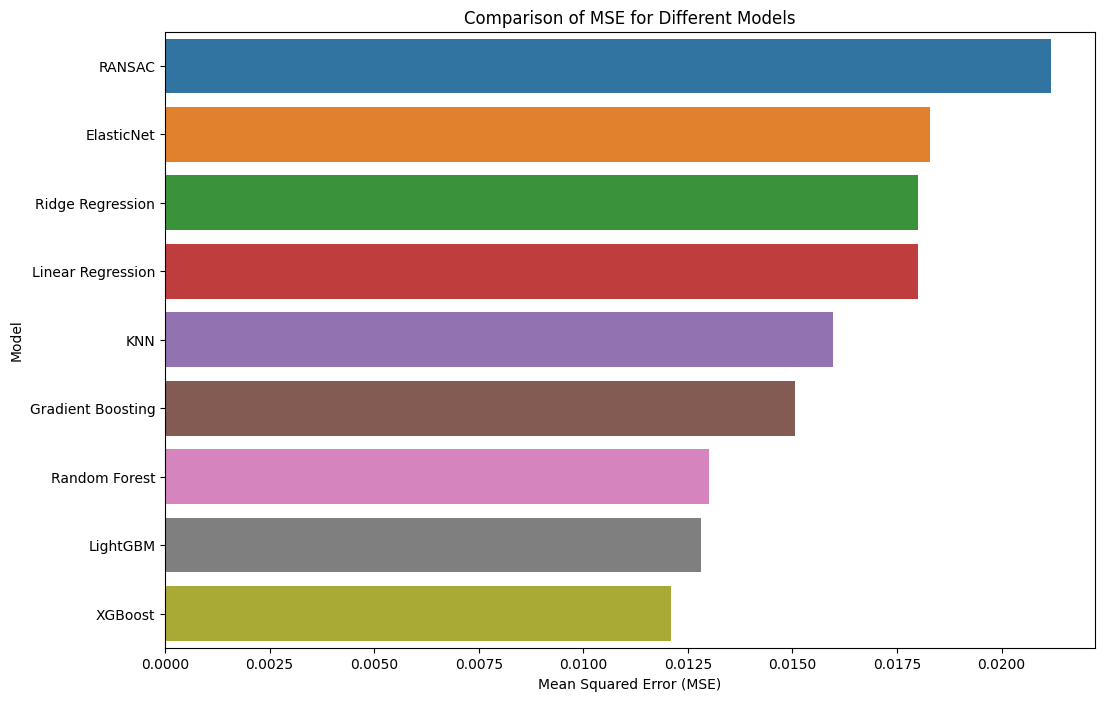

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression, RANSACRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor


X = df[['Year','Name', 'Platform', 'Genre', 'Publisher']]
y = df['Global_Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize all the models
models = {
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'ElasticNet': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'RANSAC': RANSACRegressor()
}

# Evaluate each model and store MSE
mse_results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[model_name] = mse

# Create a DataFrame from the results
results_df = pd.DataFrame(list(mse_results.items()), columns=['Model', 'MSE'])

# Plotting the results
plt.figure(figsize=(12, 8))
sns.barplot(x='MSE', y='Model', data=results_df.sort_values(by='MSE', ascending=False))
plt.title('Comparison of MSE for Different Models')
plt.xlabel('Mean Squared Error (MSE)')
plt.ylabel('Model')
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression, RANSACRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

X = df[['Year','Name', 'Platform', 'Genre', 'Publisher']]
y = df['Global_Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize all the models
models = {
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'ElasticNet': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'RANSAC': RANSACRegressor()
}

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Evaluate each model and store metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)

# Print the results
print(metrics_df)


<ipython-input-12-c70e2862c4ca>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001112 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 12760, number of used features: 5
[LightGBM] [Info] Start training from score 0.079626


<ipython-input-12-c70e2862c4ca>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-12-c70e2862c4ca>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-12-c70e2862c4ca>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-12-c70e2862c4ca>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

               Model       MSE       MAE        R2      RMSE
0            XGBoost  0.012107  0.063590  0.337646  0.110032
1           LightGBM  0.012818  0.064168  0.298767  0.113215
2         ElasticNet  0.018279  0.082432 -0.000007  0.135200
3  Gradient Boosting  0.015056  0.071044  0.176335  0.122701
4      Random Forest  0.012888  0.064725  0.294903  0.113527
5   Ridge Regression  0.018003  0.081183  0.015085  0.134176
6                KNN  0.015968  0.073986  0.126414  0.126365
7  Linear Regression  0.018003  0.081182  0.015088  0.134175
8             RANSAC  0.020905  0.068248 -0.143692  0.144587


<ipython-input-12-c70e2862c4ca>:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)


<ipython-input-22-7f1a9df5c8e6>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 12760, number of used features: 5
[LightGBM] [Info] Start training from score 0.079626


<ipython-input-22-7f1a9df5c8e6>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-22-7f1a9df5c8e6>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-22-7f1a9df5c8e6>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-22-7f1a9df5c8e6>:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000685 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 12760, number of used features: 5
[LightGBM] [Info] Start training from score 0.079626


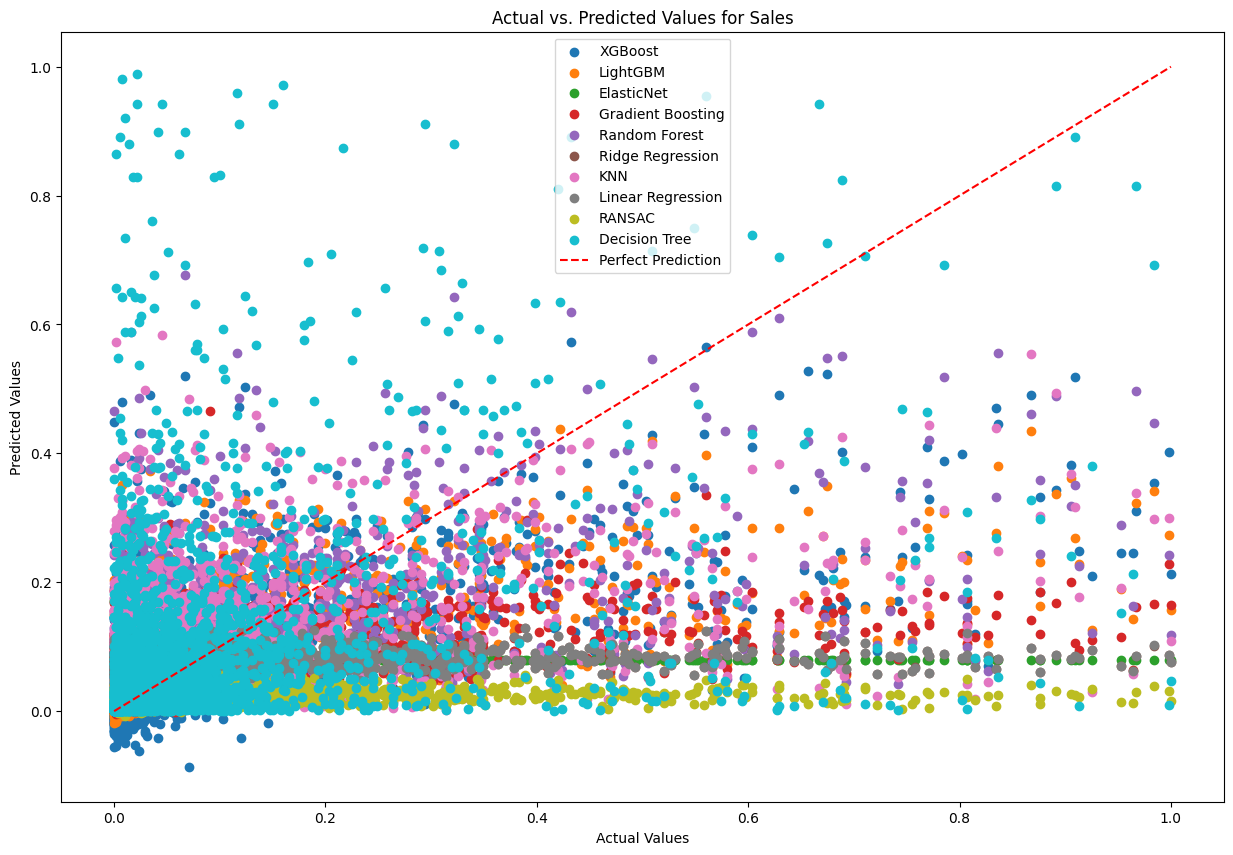

               Model       MSE       MAE        R2      RMSE
0            XGBoost  0.012107  0.063590  0.337646  0.110032
1           LightGBM  0.012818  0.064168  0.298767  0.113215
2         ElasticNet  0.018279  0.082432 -0.000007  0.135200
3  Gradient Boosting  0.015054  0.071035  0.176403  0.122696
4      Random Forest  0.013069  0.065057  0.285041  0.114318
5   Ridge Regression  0.018003  0.081183  0.015085  0.134176
6                KNN  0.015968  0.073986  0.126414  0.126365
7  Linear Regression  0.018003  0.081182  0.015088  0.134175
8             RANSAC  0.021345  0.069184 -0.167754  0.146100
9      Decision Tree  0.024475  0.080221 -0.338975  0.156445


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression, RANSACRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Year','Name', 'Platform', 'Genre', 'Publisher']]
y = df['Global_Sales']


# Initialize all the models
models = {
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'ElasticNet': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'RANSAC': RANSACRegressor(),
    'Decision Tree': DecisionTreeRegressor()  # Include Decision Tree
}

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Evaluate each model and store metrics
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)

# Plotting the results
plt.figure(figsize=(15, 10))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=model_name)

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values for Sales')
plt.legend()
plt.show()

# Print the results
print(metrics_df)


<ipython-input-24-d0d9d0a88a5e>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 546
[LightGBM] [Info] Number of data points in the train set: 12760, number of used features: 5
[LightGBM] [Info] Start training from score 0.079626


<ipython-input-24-d0d9d0a88a5e>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-24-d0d9d0a88a5e>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-24-d0d9d0a88a5e>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)
<ipython-input-24-d0d9d0a88a5e>:51: FutureWarning: The frame.append method is deprecated and will be removed from pandas in 

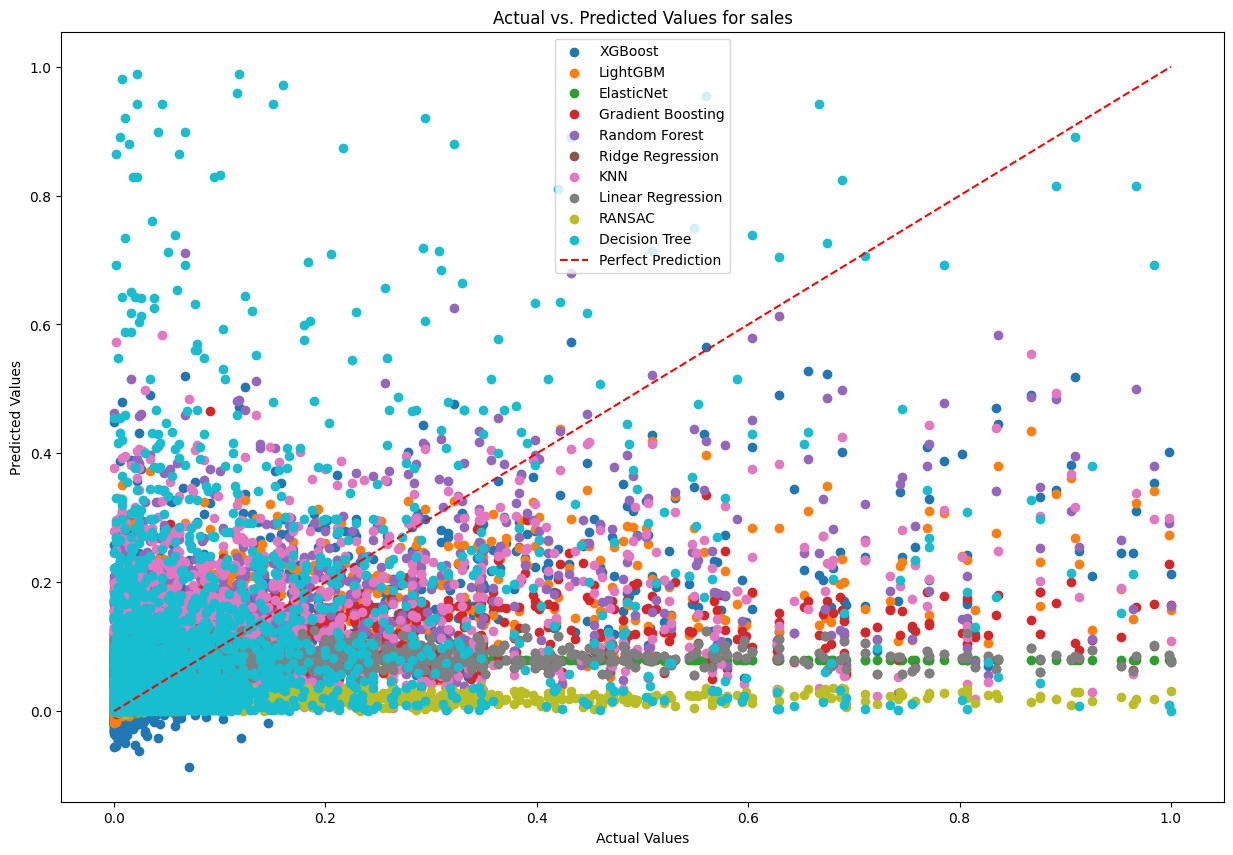

               Model       MSE       MAE        R2      RMSE
0            XGBoost  0.012107  0.063590  0.337646  0.110032
1           LightGBM  0.012818  0.064168  0.298767  0.113215
2         ElasticNet  0.018279  0.082432 -0.000007  0.135200
3  Gradient Boosting  0.015053  0.071027  0.176477  0.122691
4      Random Forest  0.013043  0.065211  0.286419  0.114208
5   Ridge Regression  0.018003  0.081183  0.015085  0.134176
6                KNN  0.015968  0.073986  0.126414  0.126365
7  Linear Regression  0.018003  0.081182  0.015088  0.134175
8             RANSAC  0.021775  0.069320 -0.191261  0.147563
9      Decision Tree  0.025211  0.080655 -0.379229  0.158779


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import ElasticNet, Ridge, LinearRegression, RANSACRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


X = df[['Year','Name', 'Platform', 'Genre', 'Publisher']]
y = df['Global_Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize all the models
models = {
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'ElasticNet': ElasticNet(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Ridge Regression': Ridge(),
    'KNN': KNeighborsRegressor(),
    'Linear Regression': LinearRegression(),
    'RANSAC': RANSACRegressor(),
    'Decision Tree': DecisionTreeRegressor()  # Include Decision Tree
}

# Create a DataFrame to store evaluation metrics
metrics_df = pd.DataFrame(columns=['Model', 'MSE', 'MAE', 'R2', 'RMSE'])

# Plotting actual vs. predicted values for each model
plt.figure(figsize=(15, 10))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plt.scatter(y_test, y_pred, label=model_name)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)

    # Store metrics in the DataFrame
    metrics_df = metrics_df.append({'Model': model_name, 'MSE': mse, 'MAE': mae, 'R2': r2, 'RMSE': rmse}, ignore_index=True)

# Plotting perfect prediction line
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Perfect Prediction')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title(f'Actual vs. Predicted Values for {target_variable}')
plt.legend()
plt.show()

# Display the metrics DataFrame
print(metrics_df)

